In [1]:
import time

import numpy as np
import numpy.linalg as la
import pandas as pd

from core.factorization.qr import (
    classical_gram_schmidt, 
    householder_reflection,
    modified_gram_schmidt
)

# Compare QR algo on well-conditioned matrix
1. complexity measured as time as a function of problem scale N
2. accuracy of Q measured as matrix norm of (Q.T * Q - I)
3. accuracy of QR measured as matrix norm of (Q * R - A)

In [2]:
perf = []

for N in (8, 16, 32, 64, 128, 256, 512, 1024, 2048):
    N = int(N)
    A = np.matmul(np.identity(N), np.random.rand(N, N))
    for func in (classical_gram_schmidt, modified_gram_schmidt, householder_reflection):
        start = time.perf_counter()
        Q, R = func(A)
        elapsed = time.perf_counter() - start
        error_q = np.linalg.norm(Q.T * Q - np.identity(N))
        error_qr = np.linalg.norm(Q * R - A)
        perf.append([N, func.__name__, elapsed, error_q, error_qr])


In [3]:
# well conditioned perf
perf = pd.DataFrame(perf, columns=["N", "func", "elapsed", "error_q", "error_qr"])
perf

,N,func,elapsed,error_q,error_qr
0,8,classical_gram_schmidt,0.000938,1.033340e-14,3.164670e-16
1,8,modified_gram_schmidt,0.000626,8.281507e-15,3.934152e-16
2,8,house_qr,0.000532,1.443534e-15,2.092172e-15
3,16,classical_gram_schmidt,0.000559,1.003118e-13,1.248843e-15
4,16,modified_gram_schmidt,0.001920,9.241350e-14,1.271282e-15
5,16,house_qr,0.000811,2.692971e-15,4.745634e-15
6,32,classical_gram_schmidt,0.000945,1.314482e-13,3.408256e-15
7,32,modified_gram_schmidt,0.009525,1.451931e-13,3.424629e-15
8,32,house_qr,0.001726,4.621658e-15,1.378310e-14
9,64,classical_gram_schmidt,0.001983,2.294884e-12,1.001336e-14


<AxesSubplot:xlabel='N'>

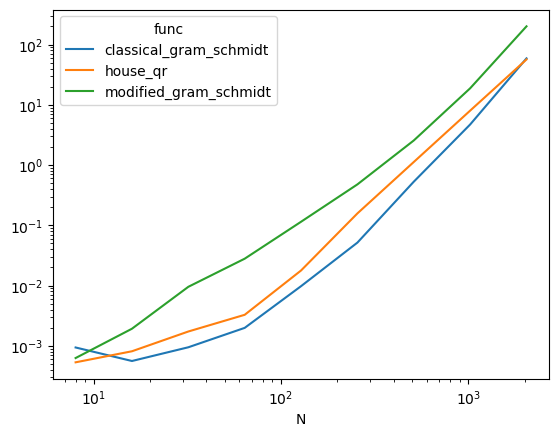

In [4]:
pd.pivot(perf, index="N", columns="func", values="elapsed").plot(loglog=True)

<AxesSubplot:xlabel='N'>

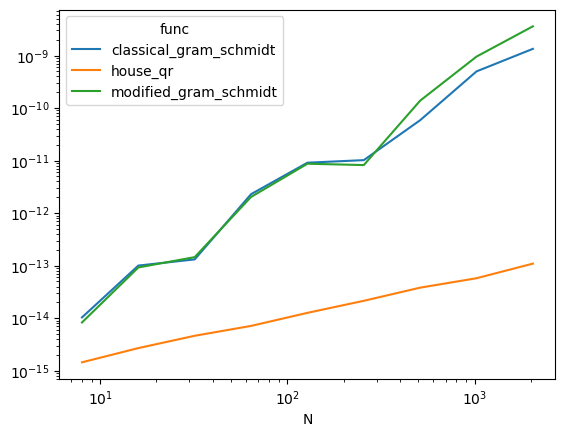

In [5]:
pd.pivot(perf, index="N", columns="func", values="error_q").plot(loglog=True)

<AxesSubplot:xlabel='N'>

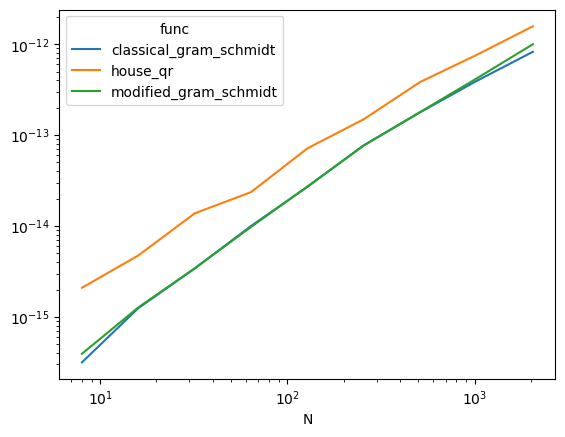

In [6]:
pd.pivot(perf, index="N", columns="func", values="error_qr").plot(loglog=True)

In [7]:
# generate matrix for a certain condition number
def gen(cond, n=100):
    log_cond_P = np.log(cond)
    exp_vec = np.arange(-log_cond_P/4., log_cond_P * (n + 1)/(4 * (n - 1)), log_cond_P/(2.*(n-1)))
    s = np.exp(exp_vec)
    S = np.diag(s)
    U, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
    V, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
    P = U.dot(S).dot(V.T)
    P = P.dot(P.T)
    return P

In [99]:
perf = []

for cond in (8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8):
    N = 100
    A = gen(cond, N)
    for func in (classical_gram_schmidt, modified_gram_schmidt, house_qr):
        start = time.perf_counter()
        Q, R = func(A)
        elapsed = time.perf_counter() - start
        error_q = np.linalg.norm(Q.T * Q - np.identity(N))
        error_qr = np.linalg.norm(Q * R - A)
        perf.append([cond, func.__name__, elapsed, error_q, error_qr])

# Comparison on Ill-conditioned Matrix

In [100]:
# ill conditioned perf
perf = pd.DataFrame(perf, columns=["cond", "func", "elapsed", "error_q", "error_qr"])
perf

,cond,func,elapsed,error_q,error_qr
0,8192,classical_gram_schmidt,0.003404,7.248253e-10,6.881329e-14
1,8192,modified_gram_schmidt,0.070363,8.465831e-10,6.879426e-14
2,8192,house_qr,0.005561,9.459374e-15,1.794138e-13
3,4096,classical_gram_schmidt,0.003233,1.407579e-10,5.013750e-14
4,4096,modified_gram_schmidt,0.067853,2.289894e-10,5.113571e-14
5,4096,house_qr,0.005656,9.575126e-15,1.299476e-13
6,2048,classical_gram_schmidt,0.003294,4.442931e-11,3.812756e-14
7,2048,modified_gram_schmidt,0.067502,4.453841e-11,3.810413e-14
8,2048,house_qr,0.005439,9.615957e-15,9.555603e-14
9,1024,classical_gram_schmidt,0.003221,1.401248e-11,2.586647e-14


<AxesSubplot:xlabel='cond'>

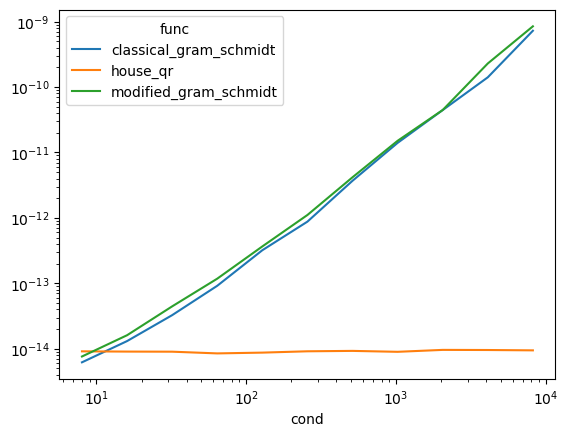

In [106]:
pd.pivot(perf, index="cond", columns="func", values="error_q").plot(loglog=True)

<AxesSubplot:xlabel='cond'>

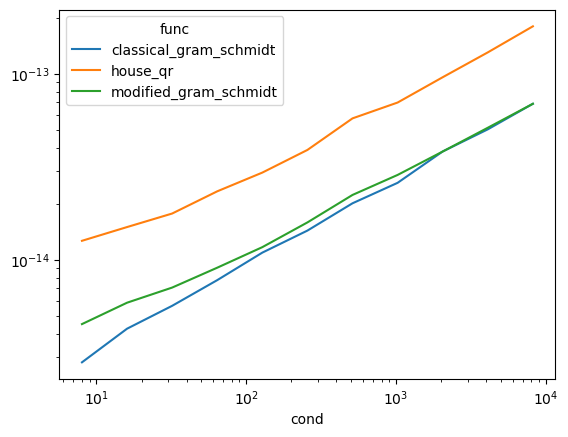

In [105]:
pd.pivot(perf, index="cond", columns="func", values="error_qr").plot(loglog=True)